# Fordgobike Trip Data Exploration

## 1. Preliminary Wrangling 
In this Notebook we will study over 183411 trips made by people 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the data
trips=pd.read_csv('201902-fordgobike-tripdata.csv')
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### 1.1 Exploring the data structure

In [3]:
trips.shape

(183412, 16)

In [4]:
trips.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### This shows that there are some outliers like the min value in member birth year is 1878 which is impossible for 142 year old to be ridding a bike

### 1.2 Cleaning Data

In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We will see here that "member_birth_year ,member_gender,end_station_name ,end_station_id,start_station_name,start_station_id"
containing null rows so we have to remove them.

In [7]:
# droping all rows with any NaN and NaT values
trip=trips.dropna()
trip.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [8]:
trip.member_birth_year = trip.member_birth_year.astype(int)
# remove the columns that are irrelevent to the research question
trip.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 1.3 Checking Duplicates

In [9]:
sum(trip.duplicated())

0

**There are no Duplicates**

### After cleaning the data

In [10]:
trip.shape

(174952, 11)

In [11]:
trip.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [12]:
trip.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No


In [13]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_latitude   174952 non-null  float64
 4   start_station_longitude  174952 non-null  float64
 5   end_station_latitude     174952 non-null  float64
 6   end_station_longitude    174952 non-null  float64
 7   user_type                174952 non-null  object 
 8   member_birth_year        174952 non-null  int32  
 9   member_gender            174952 non-null  object 
 10  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 15.3+ MB


## After cleaning the data we can answer the following Questions


### What is the structure of your dataset?
 After cleaning the data we have 174952 rows and 11 features we are keen to study.There are some numeric values and some categorical we will study the effect of each of them on the duration of the trip. 


### What is/are the main feature(s) of interest in your dataset?
The prediction of the trip duration when people choose the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The feature related to this is the day of the trip or the month , user_type,member_gender,the distance covered

## 2. Univariate Exploration

### 2.1 Duration

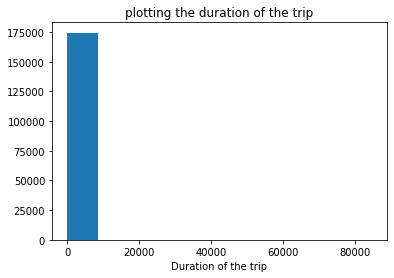

In [14]:
# duration sec is ana int feature so i will use histogram to plot its distribution
plt.hist(data=trip,x='duration_sec');
plt.xlabel('Duration of the trip');
plt.title('plotting the duration of the trip');

### As we can see it is right skewed so there is maybe some outliers we need to clean

(174779, 11)


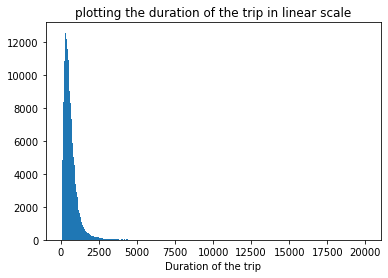

In [15]:
# removing outliers by querying the data
trip_data=trip.query('duration_sec <= 20000')
print(trip_data.shape)
bin_size=np.arange(0, trip_data['duration_sec'].max()+50, 50)
plt.hist(data=trip_data,x='duration_sec',bins=bin_size);
plt.xlabel('Duration of the trip');
plt.title('plotting the duration of the trip in linear scale');

In [16]:
np.log10(trip_data.duration_sec.describe()) ## to get the min value and max to make the size of the bin

count    5.242489
mean     2.820414
std      2.867545
min      1.785330
25%      2.509203
50%      2.707570
75%      2.895975
max      4.300726
Name: duration_sec, dtype: float64

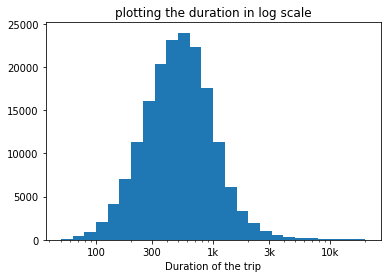

In [17]:
## Ploting in logrithmatic scale
log_binsize = 0.1 # step size
bin_size = 10 ** np.arange(1.7, 4.3+log_binsize, log_binsize)
plt.hist(data=trip_data,x='duration_sec',bins=bin_size);
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 10000], [100, 300, '1k', '3k', '10k'])
plt.xlabel('Duration of the trip');
plt.title('plotting the duration in log scale');

 #### This shows a Unimodal Distribution with an almost mean of 350 and a peak of 25k

### 2.2 Location

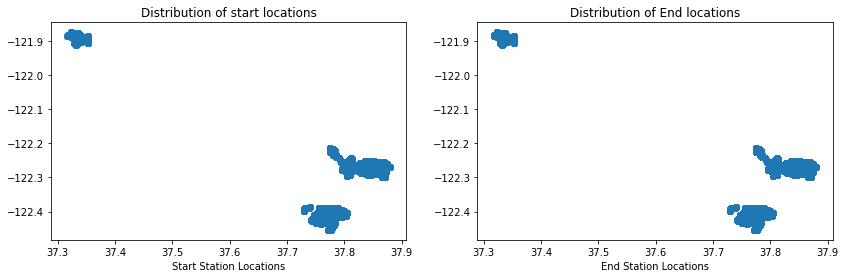

In [18]:
## ploting the end and start location distribution
## as they are numrical data i will use scatter plot
plt.figure(figsize=[14,4])
plt.subplot(1, 2, 1)
plt.scatter(data=trip_data, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')
plt.title('Distribution of start locations');
plt.subplot(1, 2, 2)
plt.scatter(data=trip_data, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');
plt.title('Distribution of End locations');

### As we can see here the start locations is between 37.7 and 37.9 while the end is between 37.7 and 37.9 which means some have same end and start location so we need to check for distances if there are some outliers

### 2.3 Distance covered

In [19]:
# first we will calculate the distance by making a column of it
## distance =sqrt((start_station_latitude-end_station_latitude)**2+(start_station_longitude-end_station_longitude)**2)
trip_data['distance']=np.sqrt((trip_data.start_station_latitude-trip_data.end_station_latitude)**2 + 
                              (trip_data.start_station_longitude-trip_data.end_station_longitude)**2)
trip_data.tail()

<ipython-input-19-4f780b471b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['distance']=np.sqrt((trip_data.start_station_latitude-trip_data.end_station_latitude)**2 +


,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,Subscriber,1996,Male,No,0.016668
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,Subscriber,1984,Male,No,0.013549
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,Subscriber,1990,Male,Yes,0.004080
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,Subscriber,1988,Male,No,0.006864
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,37.789677,-122.390428,37.785000,-122.395936,Subscriber,1989,Male,No,0.007225


In [20]:
trip_data.distance.describe()

count    174779.000000
mean          0.016940
std           0.010920
min           0.000000
25%           0.009139
50%           0.014211
75%           0.022255
max           0.699399
Name: distance, dtype: float64

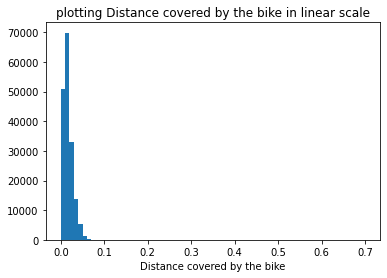

In [21]:
# Ploting the Distance
bin_size=np.arange(0,0.699+0.01 ,0.01 )
plt.hist(data=trip_data,x='distance',bins=bin_size);
plt.xlabel('Distance covered by the bike');
plt.title('plotting Distance covered by the bike in linear scale');

#### This plot shows it is right skewed so we will take a closer look 

In [22]:
## ploting in lograthmic scale
np.log10(trip_data.distance.describe())

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.242489
mean    -1.771091
std     -1.961764
min          -inf
25%     -2.039095
50%     -1.847375
75%     -1.652570
max     -0.155275
Name: distance, dtype: float64

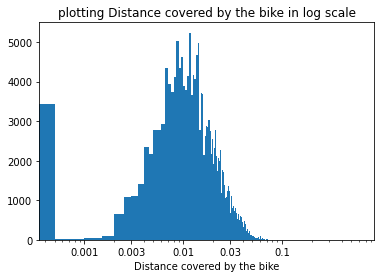

In [23]:
log_binsize = 0.0005 # step size
bin_size = np.arange(0, 0.6+log_binsize, log_binsize)
plt.hist(data=trip_data,x='distance',bins=bin_size);
plt.xscale('log')
plt.xticks([0.001, 0.003, 0.01, 0.03, 0.1], [0.001, 0.003, 0.01, 0.03, 0.1])
plt.xlabel('Distance covered by the bike');
plt.title('plotting Distance covered by the bike in log scale');

#### This plot shows that there is over 3k that have distance of less than 0.001 which is approximately 0 which means that the have same longitudinal and latitude which means the bike didn't move and there is also a unimodal distribution with mean of 0.01

### 2.4 Day of the week , Month

In [24]:
trip_data.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes,0.025835
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No,0.031301
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,37.317298,-121.884995,37.329732,-121.901782,Subscriber,1983,Female,No,0.020890
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,37.795393,-122.404770,37.756708,-122.421025,Subscriber,1989,Male,No,0.041961
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,37.795393,-122.404770,37.756708,-122.421025,Subscriber,1988,Other,No,0.041961


##### We need to separate the day and the month to know whether there is a specific day or month preferred by the people

In [25]:
# Which day of the week is the most popular
# which month is the most popular
from datetime import datetime
# extractig the date from the columns
trip_data['start_date']=trip_data.start_time.map(lambda x: x[:10])
trip_data['start_date']=trip_data.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
## saving the months and days
trip_data['start_month']=trip_data.start_date.map(lambda x:x.month)
trip_data['day_week']=trip_data.start_date.map(lambda x:x.dayofweek)
trip_data.tail(5)

<ipython-input-25-55fe6722620a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['start_date']=trip_data.start_time.map(lambda x: x[:10])
<ipython-input-25-55fe6722620a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['start_date']=trip_data.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
<ipython-input-25-55fe6722620a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,start_date,start_month,day_week
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,Subscriber,1996,Male,No,0.016668,2019-02-01,2,4
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,Subscriber,1984,Male,No,0.013549,2019-02-01,2,4
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,Subscriber,1990,Male,Yes,0.004080,2019-02-01,2,4
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,Subscriber,1988,Male,No,0.006864,2019-02-01,2,4
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,37.789677,-122.390428,37.785000,-122.395936,Subscriber,1989,Male,No,0.007225,2019-02-01,2,4


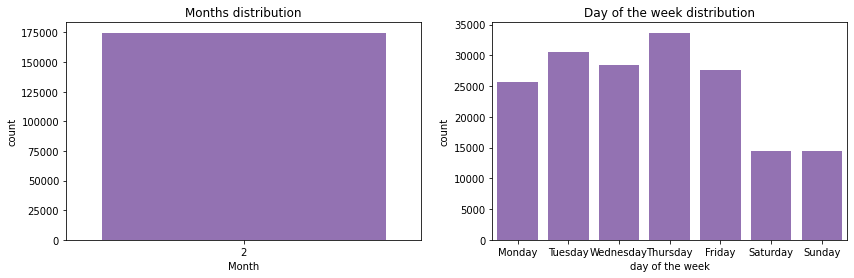

In [26]:
# ploting the distribution of the month and days
plt.figure(figsize=[14,4])
# ploting the month
plt.subplot(1, 2, 1)
color=sns.color_palette()[4]
sns.countplot(data=trip_data, x='start_month', color=color);
plt.title("Months distribution");
plt.xlabel('Month');
# plotting the day of the week
plt.subplot(1, 2, 2)
sns.countplot(data=trip_data, x='day_week', color=color);
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('day of the week');
plt.title("Day of the week distribution");


### we can see that February has largest number of trips as well as Thursday of the week

### 2.5 Birth year
We need to know the distribution of the members birth years

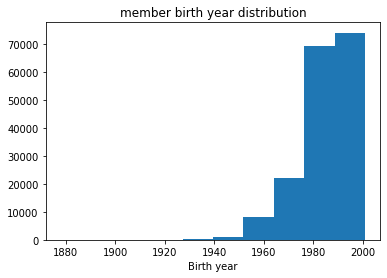

In [27]:
plt.hist(data=trip_data,x='member_birth_year');
plt.xlabel('Birth year');
plt.title('member birth year distribution');

#### This plot is left skewed which shows that a lot of people that use the bikes ranges there ages from 1980 to 2000 so let's take a closer look
**Also there are people of birth year less than 1940 which is not practical for a more than 80 year old to ride a bike so that need to be filtered**

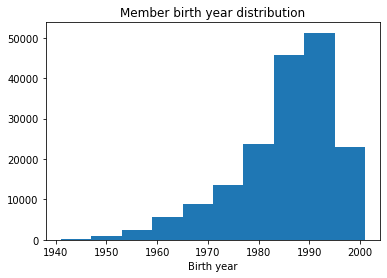

In [28]:
## let's filter the outlier which less than 1940 as it's not practical for a more than 80 to ride the bike
new_data=trip_data.query('member_birth_year >1940')
plt.hist(data=new_data,x='member_birth_year');
plt.xlabel('Birth year');
plt.title('Member birth year distribution');

**From the plot we can deduce that many people born within 1990 to 2000 book a bike so we can promote it to them**

### 2.6 Gender and User Type

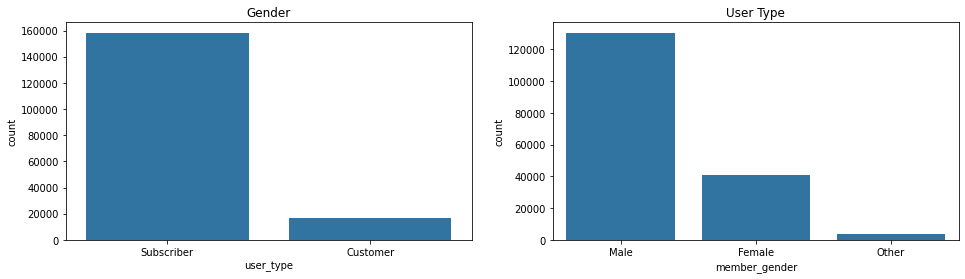

In [29]:
## here I will plot the Gender (female or male) and the user type(customer or subscriber)
fig, ax = plt.subplots(ncols=2, figsize = [16,4])
## as they are categorical i will use countplot
colors=sns.color_palette()[0]
sns.countplot(data=trip_data, x='user_type',color=colors,ax=ax[0])
ax[0].title.set_text("Gender");
sns.countplot(data=trip_data, x='member_gender',color=colors,ax=ax[1]);
ax[1].title.set_text("User Type");

#### From the two plots we can deduce that the subscriber is more likely to get a bike than a customer and the male memebers are more than the female 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- When I studied the Duration feature, I found out that it it's left skewed which means it maybe has some outliers so we need to make transformation on it so I quered the data and took their log values.
- When I studied the start and end locations, I found out that there are 3 locations so we have to get the distance to figure out if the bike had moved or not,Some distance values were less than 0.005 so I had to filtered them as the bike didn't move but I am afraid there might be a problem if the end is the start then the displacement = 0 so I assumed that the start is not the end.
- When I studied the day and the month to know whether their is a preffered month by our cutomers from the plot I get that thrusday is the most day where people take their bikes and also Feburary is the most picked month by the user.
- When I studied the type of user and their gender, I found out that subscribers are more than customers as well as the male members

## 3. Bivariate Exploration

In [30]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174779 entries, 4 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174779 non-null  int64         
 1   start_time               174779 non-null  object        
 2   end_time                 174779 non-null  object        
 3   start_station_latitude   174779 non-null  float64       
 4   start_station_longitude  174779 non-null  float64       
 5   end_station_latitude     174779 non-null  float64       
 6   end_station_longitude    174779 non-null  float64       
 7   user_type                174779 non-null  object        
 8   member_birth_year        174779 non-null  int32         
 9   member_gender            174779 non-null  object        
 10  bike_share_for_all_trip  174779 non-null  object        
 11  distance                 174779 non-null  float64       
 12  start_date      

In [31]:
numeric_vars=['duration_sec','start_station_latitude','start_station_longitude'
              ,'end_station_latitude','end_station_longitude','distance','member_birth_year']
cat_vars=['member_gender','bike_share_for_all_trip','user_type']

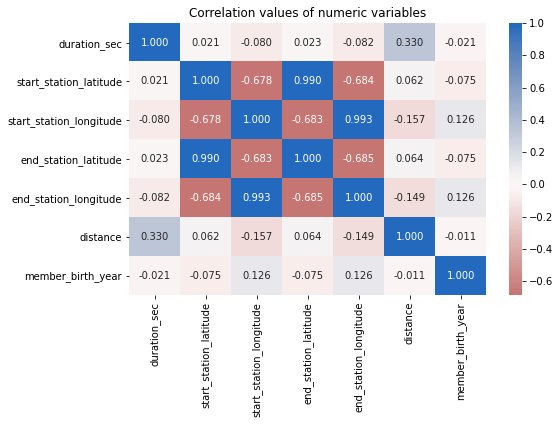

In [32]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(trip_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation values of numeric variables");
plt.show()

##### As we can see the start_station_latitude and end_station_latitude have very high positive correlation so they have a linear relashionship,the start station lat. and start station long. have -0.6 correlation which not that strong
**SO let's plot them in a pairgrid**

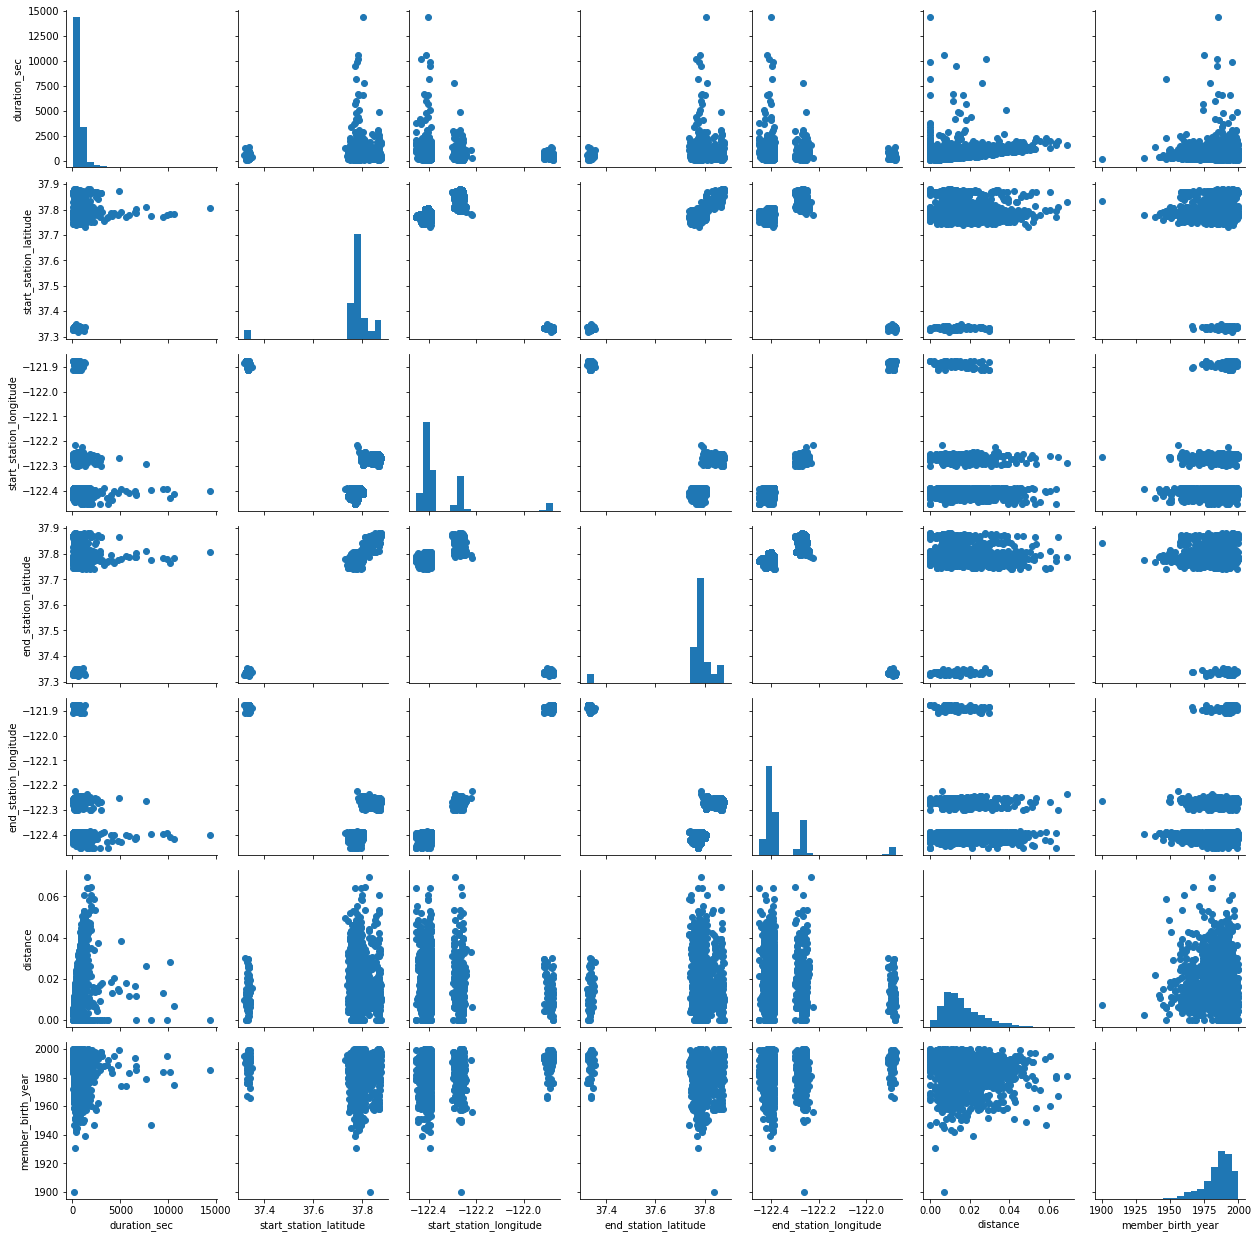

In [33]:
#  plotting 2000 samples in pairgrid
samples = np.random.choice(trip_data.shape[0], 2000, replace = False)
trip_samp = trip_data.iloc[samples,:]

g = sns.PairGrid(data = trip_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### as we can see some of these graphs have very low  correlation and some doesn't have any correlation so let's take a closer look by taking two features to study

## 3.1 Duration vs Distance

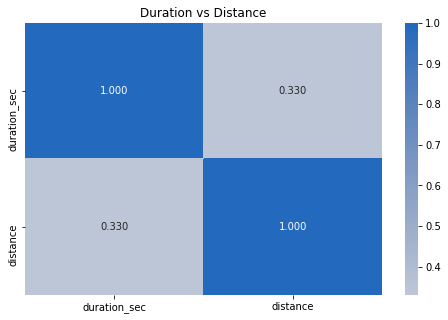

In [34]:
plt.figure(figsize = [8, 5])
sns.heatmap(trip_data[['duration_sec','distance']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Duration vs Distance");
plt.show()

#### The distance and duration have very low correlation=0.33 so they don't have a linear relashionship

## 3.2 Duration vs Birth year

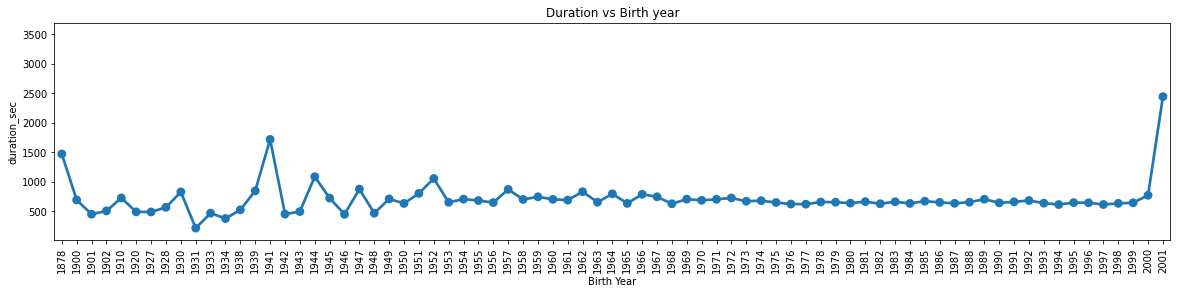

In [35]:
## Drawing point plot between Duration and birthyear
plt.figure(figsize=[20, 4])
sns.pointplot(data=trip_data, x='member_birth_year', y='duration_sec', errwidth=0)
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('duration_sec');
plt.title("Duration vs Birth year");

### plotting the Birth year vs the duration we found out the higher the birth year which means the yonger the member is the more duration it takes for the trip to be completed

## 3.3 Duration vs User Type 

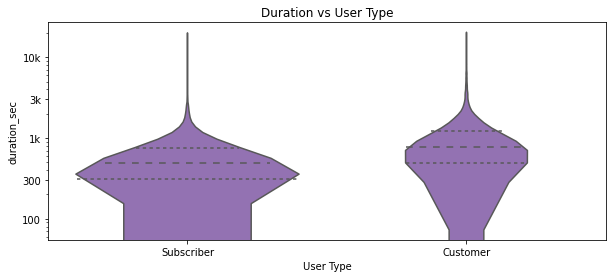

In [36]:
plt.figure(figsize=[10,4])
sns.violinplot(data=trip_data, x='user_type', y='duration_sec', color=color, inner='quartile')
plt.yscale('log')
plt.yticks([100, 300, 1000, 3000, 10000], [100, 300, '1k', '3k', '10k'])
plt.xlabel('User Type')
plt.ylabel('duration_sec')
plt.title("Duration vs User Type");
plt.show()

### Using Violinplot we noticed that the subscriber have a median and mode lower than the customer

## 3.4 Duration vs Gender

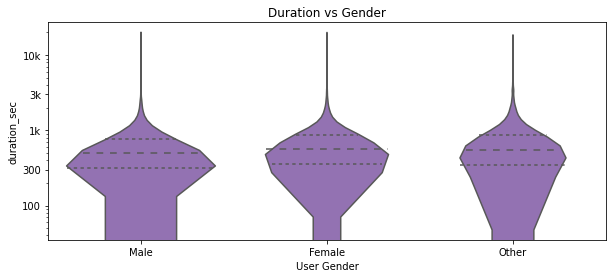

In [37]:
plt.figure(figsize=[10,4])
sns.violinplot(data=trip_data, x='member_gender', y='duration_sec', color=color, inner='quartile')
plt.yscale('log')
plt.yticks([100, 300, 1000, 3000, 10000], [100, 300, '1k', '3k', '10k'])
plt.xlabel('User Gender')
plt.ylabel('duration_sec')
plt.title("Duration vs Gender");
plt.show()

### Using Violinplot we noticed that the male and female and other have approximatly the same median and mode while the male have more even distribution.

## 3.5 Gender vs User Type

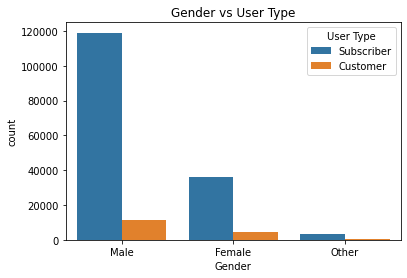

In [38]:
## relation between two categorical variables can be plotted using countplot
sns.countplot(data=trip_data, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.legend(title='User Type');
plt.title("Gender vs User Type");

### Using Countplot we noticed that the number of subscribers are in male category and also the customers are more in males so i think that males tend to use the  bikes more than female

## 3.6 Categorical Vs Numeric

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\s

<Figure size 720x720 with 0 Axes>

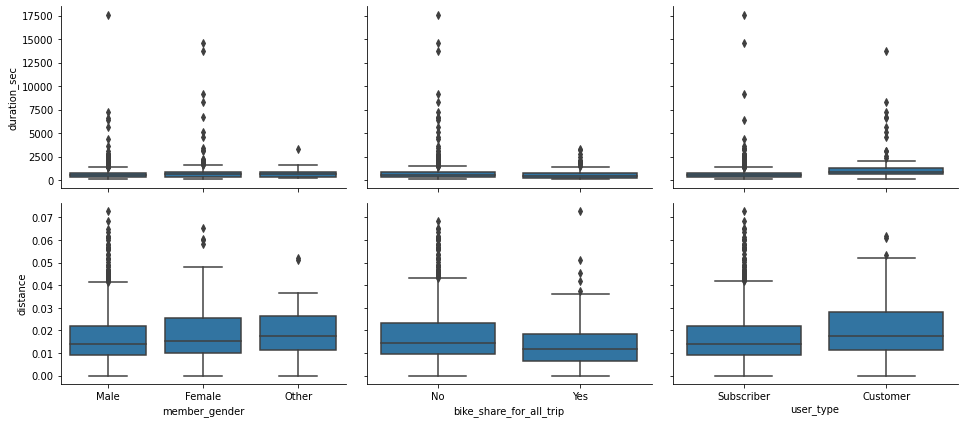

In [39]:
samples = np.random.choice(trip_data.shape[0], 2000, replace = False)
trip_data_samps = trip_data.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = trip_data_samps, y_vars = ['duration_sec', 'distance'], x_vars = cat_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

#### On looking at the graphs we can see that there is not relation between the duration and the categorical variables as it has a lot of outliers ,on the other hand the distance have a good relation between them we can see that the median of the male is slightly higher than females and other while Q1 in male is the highest one . Aslo the median of bike share (No) is higher than yes. last but not least the median of the customer is higher than subscriber compared with the distance and also has less outliers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The duration vs Distance has very low correlation
- The younger people of birth year ranges between 1990 and 2000s tend to have longer durations
- The relation between the duration and the categorical variables has a lot of outliers
- The relation between the distance and the categorical variables has less outliers and can be a good relation to take into consideration.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Number of subscribers are more than customers
- Number of male members are the highest in subscribers and customers.
- There is a relation between the distance and bike share as we can see the No bike share has a higher median than the Yes bike share


## 4. Multivariate Exploration

In [40]:
trip_data.dtypes

duration_sec                        int64
start_time                         object
end_time                           object
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
distance                          float64
start_date                 datetime64[ns]
start_month                         int64
day_week                            int64
dtype: object

### 4.1 Duration vs. Birth Year vs. User Type vs. Member Gender

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


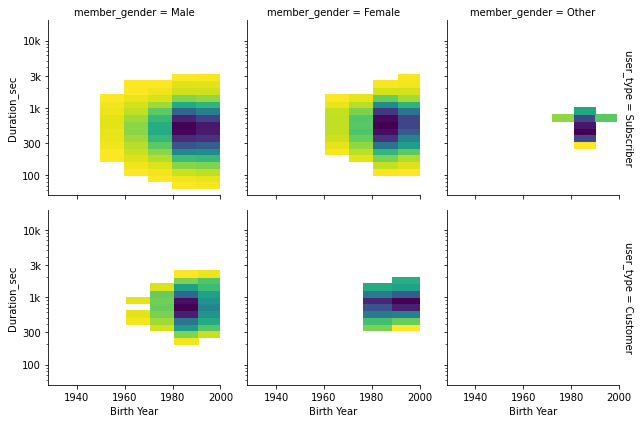

In [41]:

def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)
    
# plot the heatmap
g = sns.FacetGrid(data=trip_data, col='member_gender', row='user_type', margin_titles=True)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color='viridis_r')
g.set_xlabels('Birth Year')
g.set_ylabels('Duration_sec');


#### The peak of distribution for different people is nearly the same. However, the male subscriber accounts for a major proportion

### 4.2 Duration vs. Day vs. User Type vs. Member Gender

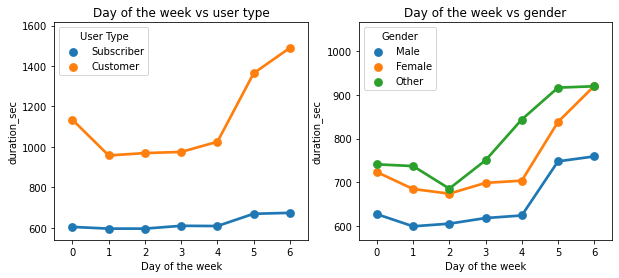

In [42]:
plt.figure(figsize=[10, 4])

# plot the point plot of day of the week vs user type
plt.subplot(1, 2, 1)
sns.pointplot(data=trip_data, x='day_week', y='duration_sec', hue='user_type', errwidth=0)
plt.xlabel('Day of the week')
plt.ylabel('duration_sec')
plt.legend(title='User Type')
plt.title("Day of the week vs user type");
# plot the point plot of Day of the week vs gender
plt.subplot(1, 2, 2)
plt.title("Day of the week vs gender");
sns.pointplot(data=trip_data, x='day_week', y='duration_sec', hue='member_gender', errwidth=0)
plt.xlabel('Day of the week')
plt.ylabel('duration_sec')
plt.legend(title='Gender');


#### when we compare the days of the week with the duration and user type we found out on day 6 the customer tends to have the largest duration while the subscriber has the less duration in that day,Also when we compare the days of the week with the gender and duration it's seems that the female and other has the same duration on day 6 and 2 while the male has less duration

### 4.3 Duration vs. User Type vs. Member Gender

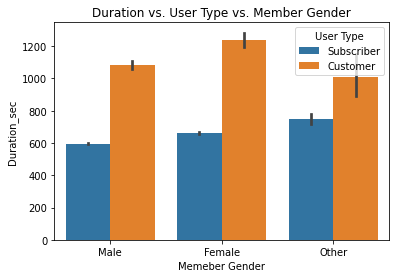

In [43]:
sns.barplot(data=trip_data, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Memeber Gender')
plt.ylabel('Duration_sec')
plt.legend(title='User Type');
plt.title("Duration vs. User Type vs. Member Gender");

#### As we can see the female and customer tends to take longer durations

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- The distribution of duration for different people is nearly the same.
- The customer has a higher average duration than the subsriber


### Were there any interesting or surprising interactions between features?
- The female customer tends to take longer durations
- The duration and user type on day 6 the customer tends to have the largest duration while the subscriber has the less duration in that day
- The Male and Young member tends to have longest duration than a male and old

# 5. Conclusion

In conclusion, there was a lot of outliers, The realtion between the distance and duration is not useful while the relation between the duration and the gender and user type and birth year is really useful which can be used to predict the distance covered.